## Import Libraries & Load Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

([<matplotlib.patches.Wedge at 0x249638e2460>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'female'),
  Text(0.018078568997005343, -1.0998514287589123, 'male')],
 [Text(-0.009861037634729992, 0.5999189611412249, '50.52'),
  Text(0.009861037634730185, -0.5999189611412248, '49.48')])

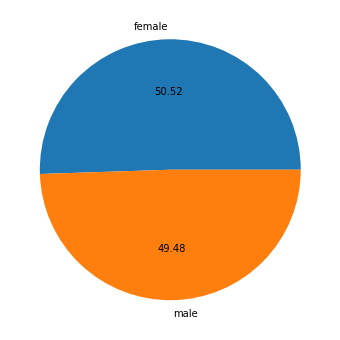

In [3]:
plt.figure(figsize=(6,6))
labels = [label for label in data["sex"].unique()]
plt.pie(data["sex"].value_counts(),labels=labels,autopct='%.2f')

([<matplotlib.patches.Wedge at 0x249639b72e0>,
 [Text(0.722119686055283, 0.8297850077046582, 'southwest'),
  Text(-0.8627681631663758, 0.6823716704454532, 'southeast'),
  Text(-0.7201694244483215, -0.8314782018127556, 'northwest'),
  Text(0.7967551940047443, -0.7584069889092945, 'northeast')],
 [Text(0.39388346512106337, 0.4526100042025408, '27.20'),
  Text(-0.47060081627256856, 0.37220272933388354, '24.29'),
  Text(-0.3928196860627208, -0.45353356462513933, '24.29'),
  Text(0.4345937421844059, -0.41367653940506965, '24.22')])

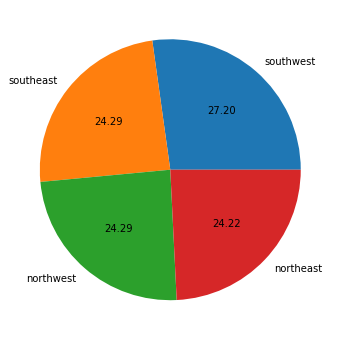

In [4]:
plt.figure(figsize=(6,6))
labels = [label for label in data["region"].unique()]
plt.pie(data["region"].value_counts(),labels=labels,autopct='%.2f')

Text(0.5, 1.0, 'Bar chart to visualize the Gender for Smoker')

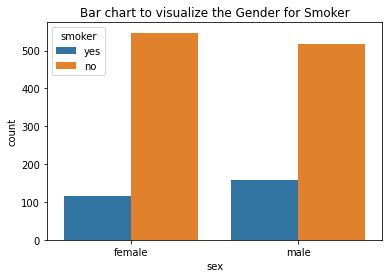

In [5]:
sns.countplot(data=data,x="sex",hue="smoker")
plt.title("Bar chart to visualize the Gender for Smoker")

Text(0.5, 1.0, 'Bar chart to visualize the Children for Gender')

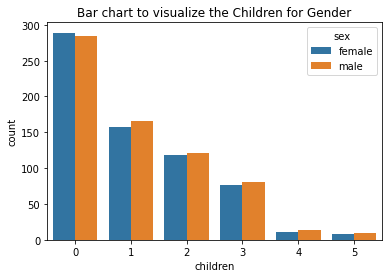

In [6]:
sns.countplot(data=data,x="children",hue="sex")
plt.title("Bar chart to visualize the Children for Gender")

Text(0.5, 1.0, 'Bar chart to visualize the Region for Gender')

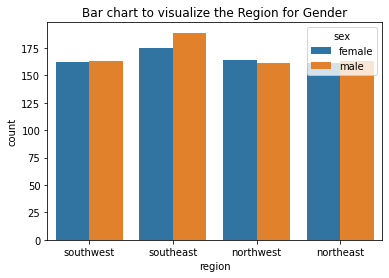

In [7]:
sns.countplot(data=data,x="region",hue="sex")
plt.title("Bar chart to visualize the Region for Gender")

Text(0.5, 1.0, 'Bar chart to visualize the Region for Smoker')

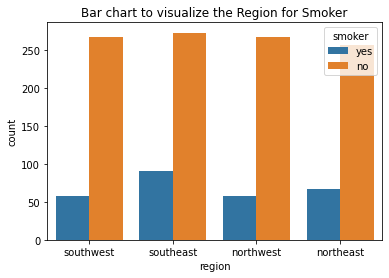

In [8]:
sns.countplot(data=data,x="region",hue="smoker")
plt.title("Bar chart to visualize the Region for Smoker")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

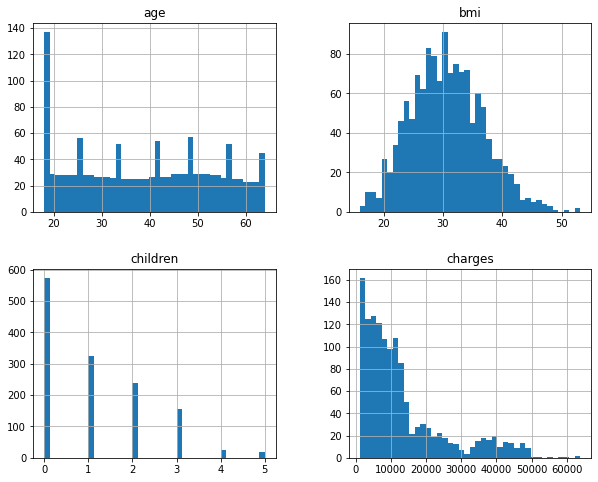

In [9]:
data.hist(figsize=(10,8),bins=40)

<AxesSubplot:>

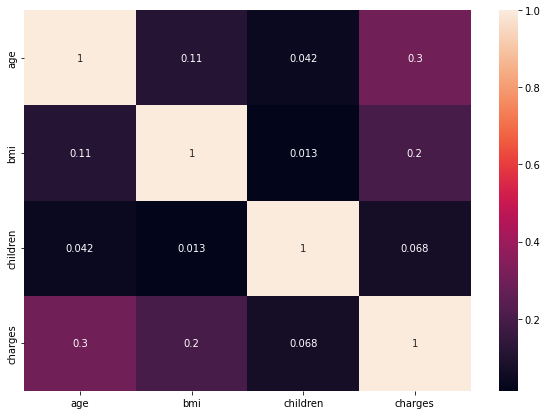

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

# Preprocessing

## Convert Categorical to numerical
### LabelEncoder

In [11]:
LE = LabelEncoder()
data["sex"] = LE.fit_transform(data["sex"])
data["smoker"] = LE.fit_transform(data["smoker"])
data["region"] = LE.fit_transform(data["region"])

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
X = data.drop(["charges"],axis=1).values
Y = data.charges.values

In [14]:
SS = StandardScaler()
X = SS.fit_transform(X)

In [15]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=13)

# Model

### LinearRegression

In [16]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predict_lr = LR.predict(x_test)

In [17]:
metrics.mean_absolute_error(y_test,predict_lr)

3804.7551761642285

### RandomForestRegressor

In [18]:
RF = RandomForestRegressor(n_estimators=90,n_jobs=-1,random_state=2)
RF.fit(x_train,y_train)
predict_rf = RF.predict(x_test)

In [19]:
metrics.mean_absolute_error(y_test,predict_rf)

2052.1367470734103

### GBoostingRegressor

In [20]:
Gboost = GradientBoostingRegressor(n_estimators=90,learning_rate=0.14,random_state=0)
Gboost.fit(x_train,y_train)
predict_gb = Gboost.predict(x_test)

In [21]:
metrics.mean_absolute_error(y_test,predict_gb)

1928.6168199529452

### XGboostRegressor

In [22]:
XGboost = XGBRFRegressor(learning_rate=0.95)
XGboost.fit(x_train,y_train)
predict_xb = XGboost.predict(x_test)

In [23]:
metrics.mean_absolute_error(y_test,predict_xb)

1791.840623254431

### CatBoostRegressor

In [24]:
catboost = CatBoostRegressor(n_estimators=500,learning_rate=0.21,eval_metric="MAE",task_type="GPU",random_state=7)
catboost.fit(x_train,y_train,[],eval_set=(x_test,y_test))

0:	learn: 7857.8757009	test: 7781.2509328	best: 7781.2509328 (0)	total: 12.7ms	remaining: 6.35s
1:	learn: 6753.7570093	test: 6559.6809701	best: 6559.6809701 (1)	total: 28.7ms	remaining: 7.13s
2:	learn: 5885.0612150	test: 5620.6119403	best: 5620.6119403 (2)	total: 41.2ms	remaining: 6.83s
3:	learn: 5212.1415888	test: 4881.8871269	best: 4881.8871269 (3)	total: 55.7ms	remaining: 6.91s
4:	learn: 4666.3593458	test: 4270.4617537	best: 4270.4617537 (4)	total: 72.7ms	remaining: 7.2s
5:	learn: 4246.0387850	test: 3792.0247201	best: 3792.0247201 (5)	total: 87.1ms	remaining: 7.17s
6:	learn: 3862.7280374	test: 3360.4239739	best: 3360.4239739 (6)	total: 104ms	remaining: 7.31s
7:	learn: 3584.5481308	test: 3063.4792444	best: 3063.4792444 (7)	total: 116ms	remaining: 7.13s
8:	learn: 3361.6754673	test: 2801.2458022	best: 2801.2458022 (8)	total: 132ms	remaining: 7.18s
9:	learn: 3203.7163551	test: 2616.4764459	best: 2616.4764459 (9)	total: 144ms	remaining: 7.04s
10:	learn: 3115.1495327	test: 2513.2224813	be

In [25]:
catboost.best_score_

{'learn': {'MAE': 2196.0843457943924, 'RMSE': 3829.8523863113287},
 'validation': {'MAE': 1841.6533348880596, 'RMSE': 3193.581024679667}}

In [26]:
predict_cat = catboost.predict(x_test)

In [27]:
acc = [{"Algorithm":"LinearRegression",'MAE': metrics.mean_absolute_error(y_test,predict_lr),'MSE': metrics.mean_squared_error(y_test,predict_lr),'R2-Score': metrics.r2_score(y_test,predict_lr)},
        {"Algorithm":"RandomForest",'MAE': metrics.mean_absolute_error(y_test,predict_rf),'MSE': metrics.mean_squared_error(y_test,predict_rf),'R2-Score': metrics.r2_score(y_test,predict_rf)},
        {"Algorithm":"Gboost",'MAE': metrics.mean_absolute_error(y_test,predict_gb),'MSE': metrics.mean_squared_error(y_test,predict_gb),'R2-Score': metrics.r2_score(y_test,predict_gb)},
        {"Algorithm":"XGboost",'MAE': metrics.mean_absolute_error(y_test,predict_xb),'MSE': metrics.mean_squared_error(y_test,predict_xb),'R2-Score': metrics.r2_score(y_test,predict_xb)},
        {"Algorithm":"Catboost",'MAE': metrics.mean_absolute_error(y_test,predict_cat),'MSE': metrics.mean_squared_error(y_test,predict_cat),'R2-Score': metrics.r2_score(y_test,predict_cat)}
       ] 

In [28]:
accurac = pd.DataFrame.from_dict(acc)
accurac

,Algorithm,MAE,MSE,R2-Score
0,LinearRegression,3804.755176,2.858032e+07,0.798926
1,RandomForest,2052.136747,1.337069e+07,0.905932
2,Gboost,1928.616820,1.078905e+07,0.924095
3,XGboost,1791.840623,1.099885e+07,0.922618
4,Catboost,1841.653234,1.019896e+07,0.928246
